# HCAHPS Patient Survey - National Level

National & state-level scores from 2013 to 2022 for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey, a national, standardized survey of hospital patients about their experiences during a recent inpatient hospital stay. 

Source: Centers for Medicare & Medicaid Services
License: Public Domain
Hosted by/downloaded from: Maven Analytics

## Recommended Analysis

1. Have hospitals made improvements in their quality of care over the past 9 years?
2. Are there any specific areas where hospitals have made more progress than others?
3. Are there still any major areas of opportunity?
4. What recommendations can you make to hospitals to help them further improve the patient experience?

### Data Dictionary Review

To understand the structure and content of each dataset, it is worth first reviewing the data dictionary.

In [2]:
# import pandas
import pandas as pd

In [3]:
# Load and display the data dictionary
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary.head(10)

,Table,Field,Description
0,Reports,Release Period (PK),Unique identifier for each HCAHPS report and t...
1,Reports,Start Date,Survey results from patients discharged betwee...
2,Reports,End Date,Survey results from patients discharged betwee...
3,States,State (PK),State abbreviation for the 50 US States (plus ...
4,States,State Name,Full state name
5,States,Region,Groups of states as defined by the United Stat...
6,Measures,Measure ID (PK),Unique identifier for each HCAHPS measure (mea...
7,Measures,Measure,The measure description
8,Measures,Type,"""Composite measures"" are made up of more than ..."
9,Questions,Question Num,Question number as it appears on the HCAHPS pa...


### 1. Have hospitals made improvements in their quality of care over the past 9 years?

To analyze improvements in hospital care quality, the tables 'Reports' and 'Measures' appear to contain the relevant information about quality metrics and their results over time.

In [4]:
# Load and inspect the reports.csv file
reports = pd.read_csv('reports.csv')
reports.head()

,Release Period,Start Date,End Date
0,07_2015,2013-10-01,2014-09-30
1,07_2016,2014-10-01,2015-09-30
2,07_2017,2015-10-01,2016-09-30
3,07_2018,2016-10-01,2017-09-30
4,07_2019,2017-10-01,2018-09-30


The **reports.csv** file contains release periods for the survey data, with start and dates for each period.

In [5]:
# Load and inspect the measures.csv file
measures = pd.read_csv('measures.csv')
measures.head()

,Measure ID,Measure,Type
0,H_COMP_1,Communication with Nurses,Composite Measure
1,H_COMP_2,Communication with Doctors,Composite Measure
2,H_COMP_3,Responsiveness of Hospital Staff,Composite Measure
3,H_COMP_5,Communication about Medicines,Composite Measure
4,H_COMP_6,Discharge Information,Composite Measure


The **measures.csv** file appears to contain various quality measures, likely used to evaluate the quality of care in hospitals.

To asses if hospitals have made improvements in quality of care, the trends in these measures need to be analyzed over the different reporting periods. To do this, the data that links these measures to specific hospital performance results needs to be reviewed. The **national_results.csv**, **state_results.csv** or **responses.csv** files may contain this data.

In [6]:
# Load and inspect the national_results.csv file
national_results = pd.read_csv('national_results.csv')
national_results.head()

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,H_CLEAN_HSP,8,18,74
1,07_2015,H_COMP_1,4,17,79
2,07_2015,H_COMP_2,4,14,82
3,07_2015,H_COMP_3,9,23,68
4,07_2015,H_COMP_5,18,17,65


The **national_results.csv** file contains information for the survey reporting period and the identifier for the quality measure, as well as percentages which appear to represent different levels of performance for each measure.

In [7]:
# Load and inspect the state_results.csv file
state_results = pd.read_csv('state_results.csv')
state_results.head()

,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,AK,H_CLEAN_HSP,8,22,70
1,07_2015,AK,H_COMP_1,9,17,74
2,07_2015,AK,H_COMP_2,10,15,75
3,07_2015,AK,H_COMP_3,11,21,68
4,07_2015,AK,H_COMP_5,19,17,64


The **state_results.csv** file appears to have similar data as the **national_results.csv** file, but broken down by state.

In [8]:
# Load and inspect the responses.csv file
responses = pd.read_csv('responses.csv')
responses.head()

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
0,07_2015,AL,10001,300 or more,27
1,07_2015,AL,10005,300 or more,37
2,07_2015,AL,10006,300 or more,25
3,07_2015,AL,10007,Between 100 and 299,30
4,07_2015,AL,10008,Fewer than 100,28


The **responses.csv** file contains the reporting period similar to other data tables, as well as the state, facility identifier, number of completed surveys and a response rate for the surveys.

To assess improvements in the quality of care, it seems best to focus on the trend in the **Top-box Percentage** column from either the **national_results.csv** or **state_results.csv** files, since this percentage most likely represents the highest level of satisfaction or performance in the quality measures.

Using a line plot at the national level, trends can be observed to see if there has been a consistent improvement, decline or stability in the quality of care as determined by the quality measures.

In [9]:
# Import visualization libraries pyplot from matplotlib as well as seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Filter the national results for Top-box Percentage
top_box_national = national_results[['Release Period', 'Measure ID', 'Top-box Percentage']]

# Pivot the data for analysis
top_box_national_pivot = top_box_national.pivot(index = 'Release Period', columns = 'Measure ID', values = 'Top-box Percentage')

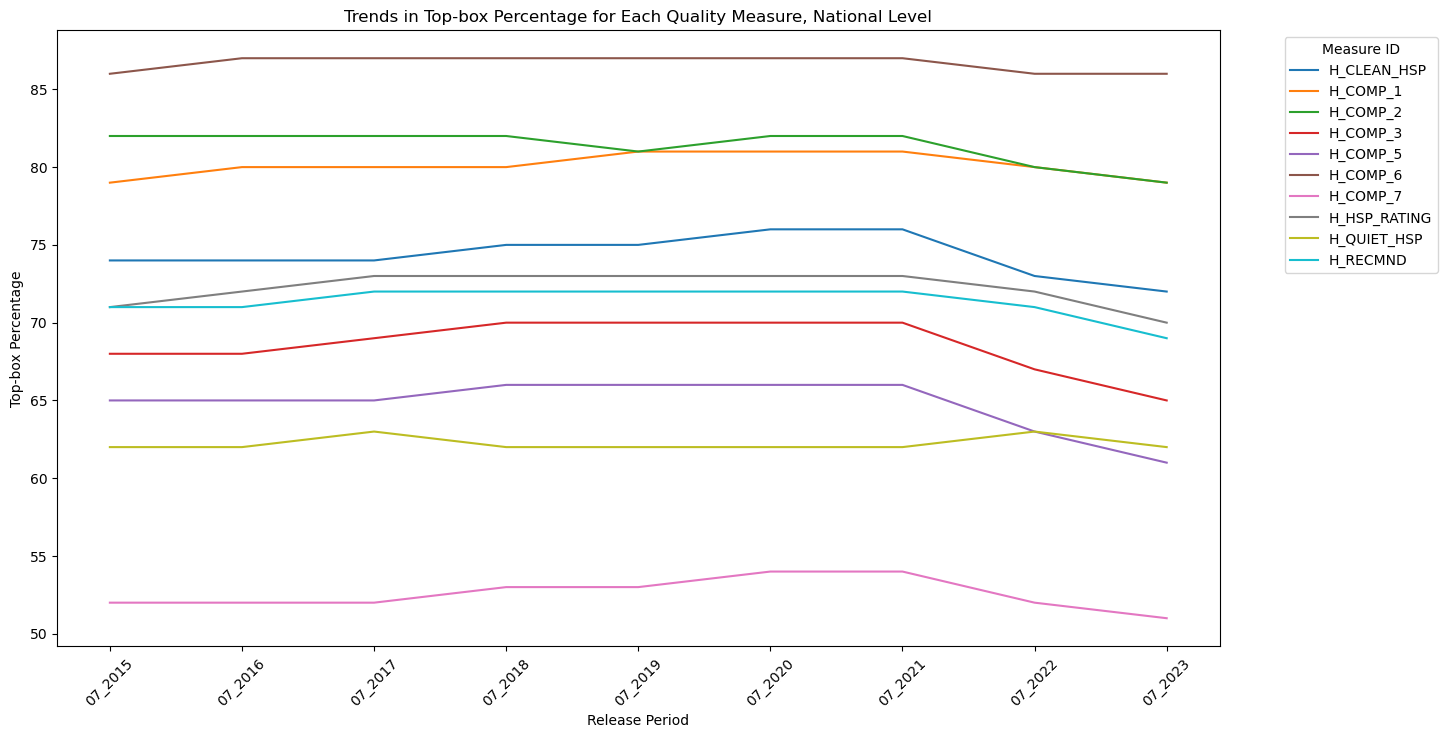

In [12]:
# Plot the trends for each quality measure
plt.figure(figsize = (15,8))
sns.lineplot(data = top_box_national_pivot, dashes = False)
plt.title('Trends in Top-box Percentage for Each Quality Measure, National Level')
plt.xlabel('Release Period')
plt.ylabel('Top-box Percentage')
plt.xticks(rotation = 45)
plt.legend(title = 'Measure ID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [16]:
# Display the pivot table for reference
top_box_national_pivot

Measure ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND
Release Period,,,,,,,,,,
07_2015,74,79,82,68,65,86,52,71,62,71
07_2016,74,80,82,68,65,87,52,72,62,71
07_2017,74,80,82,69,65,87,52,73,63,72
07_2018,75,80,82,70,66,87,53,73,62,72
07_2019,75,81,81,70,66,87,53,73,62,72
07_2020,76,81,82,70,66,87,54,73,62,72
07_2021,76,81,82,70,66,87,54,73,62,72
07_2022,73,80,80,67,63,86,52,72,63,71
07_2023,72,79,79,65,61,86,51,70,62,69


#### Observations/Results

1. **Most measures show stable or a slight improvement:**
>- For most measures (e.g. **H_COMP_1**, **H_COMP_2**, **H_COMP_3**), there is either a stable trend or a slight improvement over the survey years. For example, **H_COMP_2** (Communication with Doctors) remained steady indicating high patient satisfaction.
2. **There is a slight decline in recent years for some measures:**
>- Some measures such as **H_COMP_7**, **H_HSP_RATING**, and **H_RECMND** show a slight decline over the last couple of years, potentially indicating a dip in patient satisfaction for these specific quality measures.
3. **Facility cleanliness and quietness satisfaction appears stable:**
>- **H_CLEAN_HSP** and **H_QUIET_HSP** show a general stability albeit with some slight fluctuations, indicating an overall general satisfaction with facility cleanliness and noise levels.
4. **Medicine and discharge information:**
>- **H_COMP_5** (Communication about Medicines) and **H_COMP_6** (Discharge Information) both show stable trends, with **H_COMP_6** in particular consistenly scoring high.

Analysis of quality care improvements suggests that, overall, there has been stability or slight improvement in most quality of care measures at the national level over the past 9 years. It is important to keep in mind, however, that these results may be influenced by other non-measured factors such as changes in survey methods, patient expectations and/or changes in healthcare policy.

### 2. Are there any specific areas where hospitals have made more progress than others?

Based on the national-level data above, areas can be identified where hospitals have made more progress and those where progress has been more modest or seen a decline:

1. **Areas of more progress:**
>- Communication and Responsiveness:  Quality measures related to communication wtih doctors (**H_COMP_2**) and responsiveness of hospital staff (**H_COMP_3**) have shown stability or slight improvement, suggesting hospitals have maintained or improved how effectively staff communicates with patients and responds to patient needs.
>- Discharge Information:  The quality measure for discharge information (**H_COMP_6**) consistently scored high, indicating sustained excellence in providing patients with clear discharge instructions.
2. **Areas of modest progress or decline:**
>- Hospital Environment:  Although measures for cleanliness (**H_CLEAN_HSP**) and quietness (**H_QUIET_HSP**) remained stable, there is no sign of improvement indicating that while a standard is being maintained, there is no notable enhancement of these measures.
>- Overall Hospital Rating and Recommendation:  The quality measures for overall hospital rating (**H_HSP_RATING**) and likelihood to recommend the hospital (**H_RECMND**) show a slight decline the last couple of years. These two measures are potentially crucial indicators since they reflect overall perception and satisfaction of patients.
3. **Areas showing stability:**
>- Communication about Medicines:  The measure for communication about medicines (**H_COMP_5**) remained very steady, suggesting consistent performance.

### 3. Are there still any major areas of opportunity?

Based on the analysis of the national results, the major areas of opportunity for hospitals to improve patient quality of care and satisfaction include:
1. **Overall hospital rating and recommendaton:**
>- The quality measures **H_HSP_RATING** (overall hospital rating) and **H_RECMND** (likelihood to recommend the hospital) show a slight decline in the last couple of years. Improving in these areas can significantly impact a hospital's reputation and patient trust/satisfaction.
2. **Hospital environment:**
>- As mentioned earlier, the quality measures for hospital cleanliness and quietness remained stable, with no significant improvement over the years in the dataset. Enhancing the hospital environment can lead to a better patient experience.
3. **Communication about medicines:**
>- Although this quality measure was stable, there is always room for improvement regarding how medical information, especially medication instructions, is communicated to patients.
4. **Discharge information:**
>- Despite the discharge information measure scoring high, it is essential to continue to focus on providing clear adn thorough discharge instructions in order to reduce readmission rates and improve long-term health outcomes.
5. **Responsiveness of hospital staff:**
>- This quality measure (**H_COMP_3**) showed slight improvement but still has room for growth. Quicker and more attentive responses to patient needs can enhance patient satisfaction and quality of care.

### 4. What recommendations can be made to hospitals to help further improve the patient experience?
Based on the analysis of the data and the identified areas of opportunity, here are some recommendations for hospitals to further improve patient experience:

1. **Enhance Communication and Interpersonal Skills:**
>- Train staff, especially nurses and doctors, in effective communication and empathy. This includes actively listening to patients, explaining medical terms in an understandable language, and showing empathy and understanding of patients' concerns.
2. **Improve Responsiveness:**
>- Implement systems to ensure timely responses to patient call bells and requests. This could involve staffing adjustments, better use of technology, or process improvements to ensure staff can respond quickly to patient needs.
3. **Focus on Hospital Environment:**
>- Regularly monitor and improve cleanliness and quietness. This can include stricter cleaning protocols, noise reduction strategies (e.g., soundproofing, designated quiet hours), and ensuring maintenance issues are promptly addressed.
4. **Enhance Discharge Process:**
>- Develop clear and comprehensive discharge instructions, both verbal and written. Ensure patients understand their medications, follow-up care, and who to contact for post-discharge questions. Consider follow-up calls to ensure patients are clear about their care after leaving the hospital.
5. **Patient-Centered Care:**
>- Implement or enhance patient-centered care models that focus on the whole patient, including their physical, emotional, and social needs. This approach leads to more personalized care and can improve patient satisfaction.
6. **Gather and Act on Patient Feedback:**
>- Regularly collect patient feedback through surveys, focus groups, or suggestion boxes. More importantly, act on this feedback and make visible changes based on patient suggestions.
7. **Staff Training and Support:**
>- Provide ongoing training and support for staff in patient care and satisfaction. Happy and well-supported staff are more likely to provide better patient care.
8. **Utilize Technology:**
>- Leverage technology to improve patient experience, such as through electronic health records for better information sharing, patient portals for easy access to personal health information, and digital tools for patient education.
9. **Monitor and Benchmark Performance:**
>- Regularly review performance metrics and compare them with national or regional benchmarks. Identify areas for improvement and implement targeted strategies to address these.
10. **Foster a Culture of Excellence:**
>- Cultivate a hospital culture that values high-quality patient care, continuous improvement, and excellence. This includes recognizing and rewarding staff contributions to patient care and satisfaction.